# Project Business Statistics: E-news Express


## Define Problem Statement and Objectives

## Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement.  The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]


## Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

4. Is the time spent on the new page the same for the different language users?


## Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website

2. group - Whether the user belongs to the first group (control) or the second group (treatment)

3. landing_page - Whether the landing page is new or old

4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

5. converted - Whether the user gets converted to a subscriber of the news portal or not

6. language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest

## Reading the Data into a DataFrame

In [2]:
data=pd.read_csv('abtest.csv')

In [3]:
# makeing a copy of the dataframe to avoid changes to the original dataframe
df=data.copy()

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [4]:
# vieing the first 5 rows of the data
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [5]:
# vieing the last 5 rows of the data
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [6]:
# Checking the shape of the dataset
df.shape

(100, 6)

In [7]:
# Getting the statistical summary for the variables
df.describe(include='all')

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,100.000000,100,100,100.000000,100,100
unique,NaN,2,2,NaN,2,3
top,NaN,control,old,NaN,yes,Spanish
freq,NaN,50,50,NaN,54,34
mean,546517.000000,NaN,NaN,5.377800,NaN,NaN
std,52.295779,NaN,NaN,2.378166,NaN,NaN
min,546443.000000,NaN,NaN,0.190000,NaN,NaN
25%,546467.750000,NaN,NaN,3.880000,NaN,NaN
50%,546492.500000,NaN,NaN,5.415000,NaN,NaN
75%,546567.250000,NaN,NaN,7.022500,NaN,NaN


In [8]:
# # check the data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [9]:
# Checking for missing values
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [10]:
# Checking for duplicates
df.duplicated().sum()

0

##### observations:
+ There are 100 rows and 6 columns in our dataset
+ There are no missing values
+ There are no duplicate rows
+ 4 out of the 6 columns are of type 'object', 1 is of type 'float' and 1 is of type 'integer'

### Univariate Analysis

   ###### Ploting the histogram and boxplot of time spent on the page

In [11]:
# defining a function to plot the graph

def histogram_boxplot(data, column):
    
    sns.boxplot(data=df, x=column, showmeans=True)
    plt.title(f'boxplot of {column}', y=1.05)
    plt.xlabel(column)
    plt.show()
    
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'histogram of {column}', y=1.05)
    plt.xlabel(column)
    plt.show()

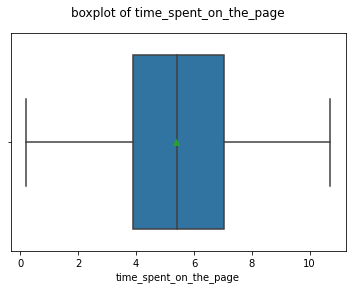

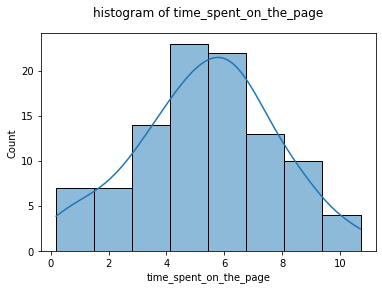

In [12]:
histogram_boxplot(df, 'time_spent_on_the_page')

#### visualizing the 'Group' column

In [13]:
#finding the unique values
df['group'].unique()

array(['control', 'treatment'], dtype=object)

In [14]:
# finding the value counts
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

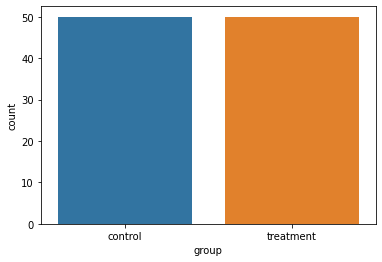

In [15]:
# plotting the counts
sns.countplot(data=df, x='group');

#### visualizing the 'landing_page' column 

In [16]:
#finding the unique values
df['landing_page'].unique()

array(['old', 'new'], dtype=object)

In [17]:
# finding the value counts
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

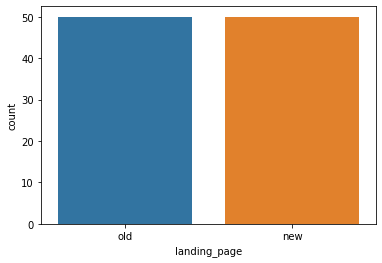

In [18]:
# plotting the counts
sns.countplot(data=df, x='landing_page');

#### visualizing the 'Converted' column

In [19]:
#finding the unique values
df['converted'].unique()

array(['no', 'yes'], dtype=object)

In [20]:
# finding the value counts
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

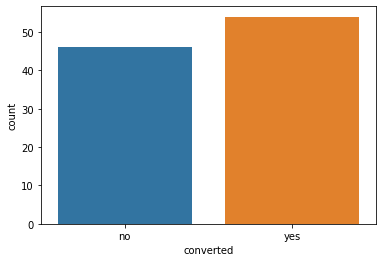

In [21]:
# plotting the counts
sns.countplot(data=df, x='converted');

#### visualizing the 'language preferred' column 

In [22]:
#finding the unique values
df['language_preferred'].unique()

array(['Spanish', 'English', 'French'], dtype=object)

In [23]:
# finding the value counts
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

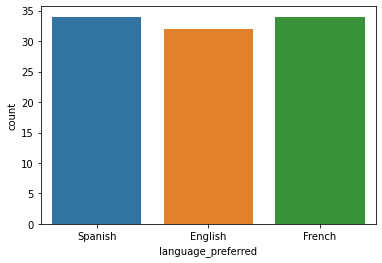

In [24]:
# plotting the counts
sns.countplot(data=df, x='language_preferred');

##### Conclusion on univariate analysis:

+ The time spent is close to a normal distribution
+ There are no outliers on the time spent
+ 50% of users spend between 3.8 to 7 minutes on the landing page
+ Almost half of the users spend less than 5.4 minutes on the landing page.
+ From the 100 samples, 34 are Spanish, 34 are French while 32 are English
+ The average time spent by the users is 5.37 minutes

### Bivariate Analysis

#### Landing page vs Time spent on the page

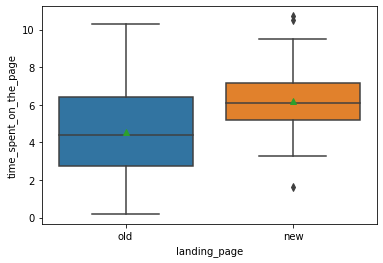

In [25]:
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page', showmeans=True)
plt.show()

In [26]:
# getting the statistics of the new landing page (treatment group) users
new_page_statistics=df.groupby('landing_page').get_group('new').describe().T
new_page_statistics

,count,mean,std,min,25%,50%,75%,max
user_id,50.0,546467.5000,14.577380,546443.00,546455.250,546467.500,546479.75,546492.00
time_spent_on_the_page,50.0,6.2232,1.817031,1.65,5.175,6.105,7.16,10.71


In [27]:
# getting the statistics of the old landing page (control group) users
old_page_statistics=df.groupby('landing_page').get_group('old').describe().T
old_page_statistics

,count,mean,std,min,25%,50%,75%,max
user_id,50.0,546566.5000,17.677670,546493.00,546555.25,546567.50,546579.7500,546592.0
time_spent_on_the_page,50.0,4.5324,2.581975,0.19,2.72,4.38,6.4425,10.3


#### Conclusion

+ The new page users(the treatments group) spent an average of 6.22 minute while the old page users (the control group) spent an average of 4.53 minutes
+ 50% of new page users(the treatments group) spent less than 6.1 minutes as opposed to 4.38 minutes spent by the old page users (the control group)
+ 50% of the users in the the treatments group spent between 5.2 to 7.16 minutes while 50% of the users in the control group spent between 2.72 to 6.44 minutes

#### Conversion status vs Time spent on the page

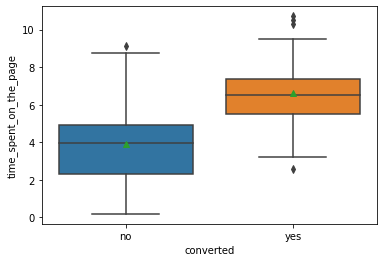

In [28]:
sns.boxplot(data=df,x='converted',y='time_spent_on_the_page', showmeans=True)
plt.show()

In [29]:
# getting the statistics of the converted users
converted_users_statistics=df.groupby('converted').get_group('yes').describe().T
converted_users_statistics

,count,mean,std,min,25%,50%,75%,max
user_id,54.0,546503.555556,48.645296,546444.00,546464.5,546481.500,546552.7500,546588.00
time_spent_on_the_page,54.0,6.623148,1.708427,2.58,5.5,6.495,7.3675,10.71


In [30]:
# getting the statistics of the unconverted users
unconverted_users_statistics=df.groupby('converted').get_group('no').describe().T
unconverted_users_statistics

,count,mean,std,min,25%,50%,75%,max
user_id,46.0,546532.782609,52.517474,546443.00,546481.0000,546561.50,546573.7500,546592.00
time_spent_on_the_page,46.0,3.915870,2.226897,0.19,2.3375,3.98,4.9225,9.15


#### Conclusion

+ The users that converted spent an average of 6.6 minute while the unconverted users spent an average of 3.39 minutes
+ 50% of users that converted spent less than 6.49 minutes as opposed to 3.98 minutes spent by the unconverted users
+ 50% of the users that were converted spent between 5.5 to 7.36 minutes while 50% of the users that were not converted spent between 2.3 to 4.9 minutes

#### Language preferred vs Time spent on the page

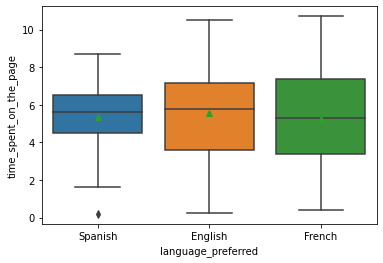

In [31]:
sns.boxplot(data=df,x='language_preferred',y='time_spent_on_the_page', showmeans=True)
plt.show()

###### Conclusion

+ The Spanish users spend the least range of time compared to other users with 50% of them spending between 4.5 to 6.6 minutes

#### converted vs landing_page

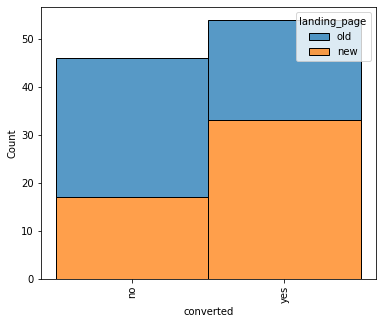

In [32]:
plt.figure(figsize=(6,5))
sns.histplot(data=df, x="converted", hue="landing_page", binwidth=0.5, stat="count", multiple="stack")
plt.xticks(rotation=90)
plt.show()

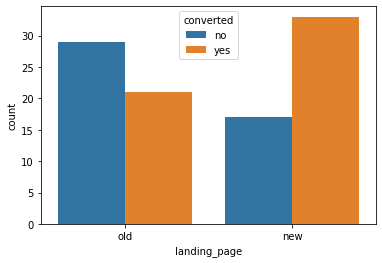

In [33]:
#plotting with sns.countplot
sns.countplot(data=df, x='landing_page', hue='converted');

##### Conclusion:

+ About 34 people from the treatment group gets converted while about 21 from the control group gets converted
+ More users gets converted from the new landing page than from the old landing page

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

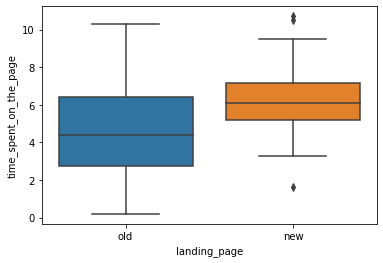

In [34]:
#potting the boxplot of landing page and time_spent_on_the_page

sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.show()

### Step i: Define the null and alternate hypotheses

###### Stating the null and alternative hypothesis

The null and alternative hypotheses can be formulated as:

> $H_0:$ The mean time spent on the new landing page is the same as the time spent on the existing page <br>
> $H_a:$ The mean time spent on the new landing page is more than the time spent on the existing page

Let $\mu_1, \mu_2$ be the mean time spent on the new landing page and the existing page respectively.<br>

Mathematically, the above formulated hypotheses can be written as:

**null hypothesis**

>$H_0:\mu_1=\mu_2$

**alternate hypothesis**

>$H_a:\mu_1>\mu_2$

### Step ii: Select Appropriate test

This is a case of a one-tailed test for comparing the means from two populations. As we are comparing means calculated from two different population, the two groups become independent. Also, the population standard deviations are unknown. Hence, a two-sample independent t-test is the most appropriate test for this case.

**Two-sample independent t-test**

In a two-sample independent t-test, we compare the means from two independent populations to check if they differ significantly. We are provided that the sample is randomly selected.

### Step iii: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Step iv: Collect and prepare data

In [35]:
# observing the unique values in the landing page column
df['landing_page'].unique()

array(['old', 'new'], dtype=object)

In [36]:
#grouping the landing page to saparate them into their disctint values
landing_page_group = df.groupby('landing_page')

#extracting the 'time_spent_on_the_page' from each unique value o the landing page
time_new_page = landing_page_group.get_group('new')['time_spent_on_the_page']
time_old_page = landing_page_group.get_group('old')['time_spent_on_the_page']

### Step v: Calculate the p-value

In [37]:
# calculating the p-value with the two-sample independent t-test
test_statistics, p_value = stats.ttest_ind(time_new_page, time_old_page, alternative='greater')
p_value=round(p_value, 5)
p_value

0.00013

### Step vi: Compare the p-value with $\alpha$

In [38]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.00013 is less than the level of significance, we reject the null hypothesis.


### Step vii:  Draw inference

As the p-value (~0.00013) is less than the level of significance, we reject the null hypothesis. Hence, we do have enough evidence to support the claim that the users spend more time on the new landing page than on the existing landing page.

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

#### Performing Visual Analysis

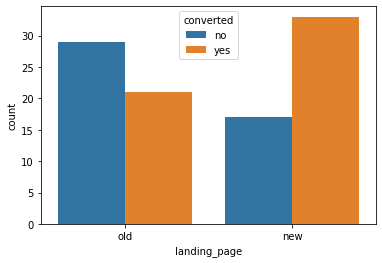

In [39]:
#plotting with sns.countplot
sns.countplot(data=df, x='landing_page', hue='converted');

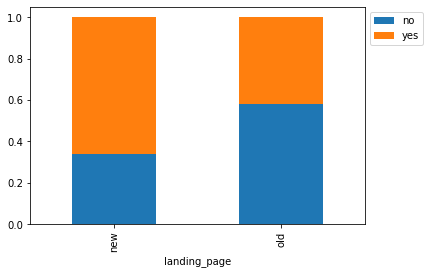

In [40]:
#plotting a stakced bar with the pandas.crosstab function
pd.crosstab(df['landing_page'],df['converted'],normalize='index').plot(kind="bar",stacked=True)
plt.legend(bbox_to_anchor=[1,1])
plt.show()

### Step i: Define the null and alternate hypotheses

###### Stating the null and alternative hypothesis

Let $p_1$ be the proportion of users who visit the the new landing page and get converted.<br>
Let $p_2$ be the proportion of users who visit the the old landing page and get converted.

**The null hypothesis is**

>$H_0:p_1 =p_2$

**The alternate hypothesis is**

>$H_a:p_1 > p_2$

### Step ii: Selecting Appropriate test

Since this is a one-tailed test involving the Comparison of sample proportions from two populations we shall use the **Two Proportion Z-test** but we will need to confirm if our data meets all the proportion for a **Two Proportion Z-test**

#### Let's test whether the Z-test assumptions are satisfied or not
+ Binomally distributed population - Yes, 
+ Random sampling from the population - Yes
+ Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.

In [41]:
#creating a contingency table to have a general view of the proportion
contingency_table = pd.crosstab(df['converted'], df['landing_page'])
contingency_table

landing_page,new,old
converted,,
no,17,29
yes,33,21


In [42]:
#make a copy of the contingency_table
proportion_table = contingency_table.copy()

#adding a new row and column named total, to the contingency table to sum up the rows and colums
proportion_table['total']=proportion_table.sum(axis=1)  
proportion_table.loc['total'] = proportion_table.sum(axis=0)  
proportion_table

landing_page,new,old,total
converted,,,
no,17,29,46
yes,33,21,54
total,50,50,100


Let's check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.

Taking our values from the proportion_table above
>$np_1 = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-33}{200} =17 \geq 10 \\
np_2 = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_2) = 50 \cdot \frac{50-21}{50} =29 \geq 10 $


from the above calculation we can say that the the binomial distribution approximated to normal distribution since the np and n(1-p) are greater than or equal to 10

### Step iii: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step iv: Collecting and preparing the data

In [43]:

# Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page 
# greater than the conversion rate for the old page?

# number of new landing page converters
new_page_converted = df[df['landing_page']=='new'].converted.value_counts()['yes']
# number of old landing page converters
old_page_converted = df[df['landing_page']=='old'].converted.value_counts()['yes']

print(f'The numbers of new page and old page converters are {new_page_converted} and {old_page_converted} respectively')

# total number of new landing pages in the data
num_new_page = df['landing_page'].value_counts()['new']

# total number of old landing pages in the data
num_old_page = df['landing_page'].value_counts()['old']

print('The total numbers of new page users and old page users are {0} and {1} respectively'.format(num_new_page, num_old_page))

The numbers of new page and old page converters are 33 and 21 respectively
The total numbers of new page users and old page users are 50 and 50 respectively


In [44]:
print(f' The proportions of converters of the new and old pages are {round(33/50,2)}, {round(21/50,2)} respectively')

 The proportions of converters of the new and old pages are 0.66, 0.42 respectively


The proportions in the sample are different. Let's conduct the test to see if this difference is significant.

### Step v: Calculate the p-value

In [45]:
# calculating p-value with proportions_ztest
stat, pval = proportions_ztest([new_page_converted, old_page_converted] , [num_new_page, num_old_page], alternative ='larger')

print('The p-value is', pval)

The p-value is 0.008026308204056278


### Step vi: Compare the p-value with α

In [46]:
# print the conclusion based on p-value
if pval < 0.05:
    print(f'As the p-value {pval} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {pval} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step vii: Draw inference 

As the p-value is less than the significance level 0.05, we reject the null hypothesis. Thus, the we do have enough statistical significance to conclude that the proportion of users who visit the the new landing page and get converted is greater than the proportion of users who visit the the old landing page and get converted.

## 3. Is the conversion and preferred language are independent or related?

##### Performing Visual Analysis

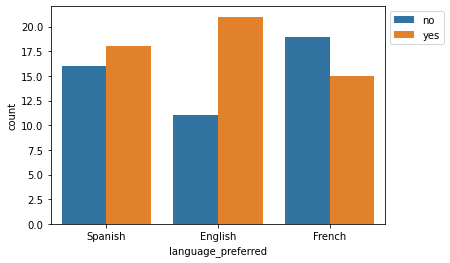

In [47]:
#plotting with sns.countplot
sns.countplot(data=df, x='language_preferred', hue='converted')
plt.legend(bbox_to_anchor=[1, 1]);

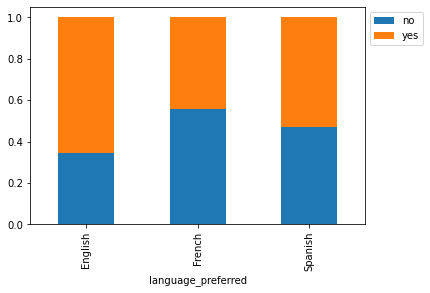

In [48]:
pd.crosstab(df['language_preferred'],df['converted'],normalize='index').plot(kind="bar", stacked=True)
plt.legend(bbox_to_anchor=[1, 1]);
plt.show()

### Step i: Define the null and alternate hypotheses

##### Let's write the null and alternative hypothesis


**null hypothesis**

>$H_0:$ Converted status is independent of the preferred language.

**alternative hypothesis**

>$H_a:$ Converted status depends on preferred language.

### Step ii: Select Appropriate test

The formulated hypotheses can be tested using a Chi-square test of independence, Since the test involves comparing the relationship between two categorical variables.

##### Let's test whether the assumptions are satisfied or not

* Categorical variables - **Yes**.
* Expected value of the number of sample observations in each level of the variable is at least 5 - **Yes**.
* Random sampling from the population - **Yes**.

### Step iii: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step iv: Collect and prepare data

In [49]:
# to calculate the chi square test or independence, a contingency table of frequencies is required.
contingency_table = pd.crosstab(df['converted'],df['language_preferred'])
contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step v: Calculate the p-value

In [50]:
chi2_stat, pval, DoF, exp_val = stats.chi2_contingency(contingency_table, correction=True)
print('The p-value is', pval)

The p-value is 0.21298887487543447


### Step vi: Compare the p-value with α

In [51]:
if pval < 0.05:
    print(f'As the p-value {pval} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {pval} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step vii: Draw inference

Since the p-value is > 0.05, we fail to reject the null hypothesis. Hence, we do not have enough statistical evidence to say that converted status is NOT independent of preferred language.

## 4. Is the time spent on the new page same for the different language users?

##### Performing Visual Analysis

In [52]:
# create a new DataFrame for users who got served the new page
df_new = df.groupby('landing_page').get_group('new')
df_new.head(7)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French
12,546491,treatment,new,5.86,yes,Spanish
13,546478,treatment,new,6.03,yes,French


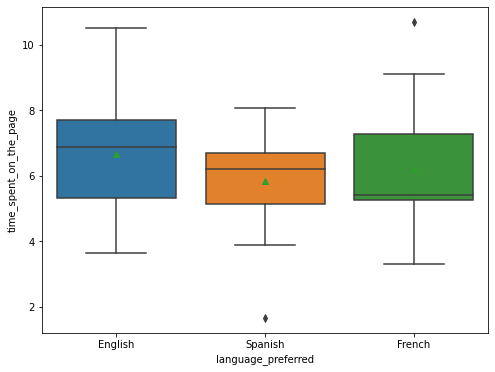

In [53]:
# plotting boxplot of time_spent_on_the_page and language_preferred
plt.figure(figsize=(8,6))
sns.boxplot(data=df_new, x='language_preferred', y='time_spent_on_the_page', showmeans=True)
plt.show()

In [54]:
# calculating the means time spent by users of various language group
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

### Step i: Define the null and alternative hypotheses

The null and alternative hypotheses can be formulated as:

> $H_0$ : The mean time spent on the new page is equal for the different language users. <br>
> $H_a$ : At least one of the  mean time spent on the new page with respect to different language users is different.

### Step ii: Select Appropriate test

This is a problem, concerning three population means. One-way ANOVA is an appropriate test here provided normality and equality of variance assumptions are verified.

###### The results from an ANOVA test are most reliable when the assumptions of normality and equality of variances are satisfied.

* For testing of normality, I'll apply Shapiro-Wilk’s test to the response variable.

* For equality of variance, Levene test will be applied to the response variable.

**Shapiro-Wilk’s test**

We will test the null hypothesis

>$H_0:$ The time spent on the new landing page follows a normal distribution

against the alternative hypothesis

>$H_a:$ The time spent on the new landing page do not follow a normal distribution

In [55]:
# Assumption 1: Normality
# I am Using the shapiro function for the scipy.stats library for this test

# finding the p-value
w_stats, p_value = stats.shapiro(df_new['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is greater than the 0.05 significance level, we fail to reject the null hypothesis that the response follows the normal distribution.

**Levene’s test**

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [56]:
#Assumption 2: Homogeneity of Variance
# using levene function from scipy.stats library for this test

# finding the p-value
statistic, p_value = stats.levene(df_new[df_new['language_preferred']=='English']['time_spent_on_the_page'],
                                  df_new[df_new['language_preferred']=='Spanish']['time_spent_on_the_page'],
                                  df_new[df_new['language_preferred']=='French']['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is greater than the 0.05 significance level, we fail to reject the null hypothesis of homogeneity of variances.

### Step iii: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step iv: Collect and prepare data

In [57]:
# create separate variables to store the time spent on new landing page with respect to the three languages
time_spent_English = df_new[df_new['language_preferred']=='English']['time_spent_on_the_page']
time_spent_Spanish = df_new[df_new['language_preferred']=='Spanish']['time_spent_on_the_page']
time_spent_French = df_new[df_new['language_preferred']=='French']['time_spent_on_the_page']
 

### Step v: Calculate the p-value

In [58]:
# find the p-value
test_stat, p_value = stats.f_oneway(time_spent_English, 
                                    time_spent_Spanish, 
                                    time_spent_French)

print('The p-value is ', p_value)

The p-value is  0.43204138694325955


### Step vi: Compare the p-value with α

In [59]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step vii: Draw inference

Since the p-value is greater than the level of significance (5%), we fail reject the null hypothesis. Hence, we do not have enough statistical evidence to say that at least one of the mean time spent on the new landing page with respect to the three languages is different.

## Conclusion and Business Recommendations

#### Conclusion based on descriptive statistics, EDA and visualization

+ There are 100 rows and 6 columns in our dataset
+ There are no missing values
+ There are no duplicate rows
+ 4 out of the 6 columns are of type 'object', 1 is of type 'float' and 1 is of type 'integer'
+ The time spent is close to a normal distribution
+ There are no outliers on the time spent
+ 50% of users spend between 3.8 to 7 minutes on the landing page
+ Almost half of the users spend less than 5.4 minutes on the landing page.
+ From the 100 samples, 34 are Spanish, 34 are French while 32 are English
+ The average time spent by the users is 5.37 minutes
+ The new page users(the treatments group) spent an average of 6.22 minute while the old page users (the control group) spent an average of 4.53 minutes
+ 50% of new page users(the treatments group) spent less than 6.1 minutes as opposed to 4.38 minutes spent by the old page users (the control group)
+ 50% of the users in the the treatments group spent between 5.2 to 7.16 minutes while 50% of the users in the control group spent between 2.72 to 6.44 minutes
+ The users that converted spent an average of 6.6 minute while the unconverted users spent an average of 3.39 minutes
+ 50% of users that converted spent less than 6.49 minutes as opposed to 3.98 minutes spent by the unconverted users
+ 50% of the users that were converted spent between 5.5 to 7.36 minutes while 50% of the users that were not converted spent between 2.3 to 4.9 minutes
+ The Spanish users spend the least range of time compared to other users with 50% of them spending between 4.5 to 6.6 minutes
+ About 34 people from the treatment group gets converted while about 21 from the control group gets converted
+ More users gets converted from the new landing page than from the old landing page

#### Conclusions based on inferential statistics and hypothesis testing

+ We have enough evidence to support the claim that the users spend more time on the new landing page than on the existing landing page.
+  We have enough statistical significance to conclude that the proportion of users who visit the the new landing page and get converted is greater than the proportion of users who visit the the old landing page and get converted.
+ We do not have enough statistical evidence to say that converted status is dependent on preferred language.
+ We do not have enough statistical evidence to say that at least one of the mean time spent on the new landing page with respect to the three languages is different.

#### Business Recommendations

+ From our findings, the proportion of users who visit the the new landing page and gets converted is greater than the proportion of users who visit the the old landing page and get converted.The existing page should definitely be scrapped and a new, better and more engaging landing page should be introduced.


+ Since the users spend more time on the new landing page than the existing landing page. it means that they find the new page more engaging and intersting than the old one. Constant efforts should be directed towards improving the quality of the new landing page to increase time spent, because the more the time spent on the pages, the higher the probability of conversion.


+ The company can consider other alternatives for driving more traffic to the website because the higher the traffic generated, the more the probability of the users converting. A good option will be to advertize the website on various social media network or employ the services of a digital marketer to drive traffic to the website.



# THE END !!